In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 2.9MB 48.0MB/s 
     |████████████████████████████████| 890kB 51.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=d076031a0a3d049deae5de1ff549b877254d3320a2a53cb231a2197d6d06b5d9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip install matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
fm._rebuild()

구글 드라이브와 Colab을 연동합니다.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
os.listdir('gdrive/My Drive/pytest')

['201901-202003.csv',
 'stopwords-ko.txt',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx',
 'model',
 'sentiment_model.h5',
 'sentiment_model1.h5',
 'bert.h5',
 'submission.csv',
 'new_2007_2018_고지혈증.xlsx',
 '패스트캠퍼스']

In [ ]:
df = pd.read_csv('gdrive/My Drive/pytest/위험 척도 유형 (해당없음 제거) .csv')

In [ ]:
list1 = df.values.tolist()

In [ ]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [ ]:
def clean_punc(text, punct, mapping):
  for p in mapping:
    text = text.replace(p, mapping[p])

  for p in punct:
    text = text.replace(p, f' {p} ')

  specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
  for s in specials:
    text = text.replace(s, specials[s])

  return text.strip()


In [ ]:
Text = []
Senti = []
for line in list1:
  Text.append(str(line[1]))
  # 텍스트가 있는 부분에 float형태가 있어 형태를 변환 
  Senti.append(line[2])

# 텍스트와 라벨을 개별 리스트에 저장 

In [ ]:
print(len(Text))
print(len(Senti))

6528
6528


In [ ]:
cleaned_corpus = []
# 빈 리스트 생성 
for line in Text:
  cleaned_corpus.append(clean_punc(line, punct, punct_mapping))

In [ ]:
for i in range(0,10):
  print(cleaned_corpus[i])
# 처리가 잘된것을 볼 수 있다.

친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다 .  어머니는 협의이혼을 생각 중이신데 미성년자인 동생이 있어서 3개월 간 숙려기간을 가져야 한다고 알고 있습니다 . 1 )  협의이혼 시 3개월의 숙려기간 동안 친부와 따로 살도록 할 수 있나요 ?  가정폭력에 대한 증거가 고막천공으로 치료받았다는 진단서밖에 없는데 신고를 해서 접근금지 처분을 내릴 수 있나요 ? 2 )  만약 친부가 이혼에 반대하면 진단서로 가정폭력했다는 사실을 증명해서 이혼소송을 걸 수 있나요 ? 3 )  향후 미성년자인 동생의 양육권 분쟁에서 제가 당한 가정폭력을 근거로 친모가 양육권을 가져갈 수 있도록 할 수 있나요 ? 4 )  위 절차에 필요한 진단서는 치료를 받았던 의원에 가서 뗄 수 있나요 ?
저는 스무살 여잔데 집에서 가정폭력이 일어나요어릴땐 신체적 폭력도 많이 당했는데 성인이 된 이후에는 손지검은 없지만 정신척 폭력을 심하게 당하고 있어요 신고를 하면 저는 어디로 가죠 그게 두려워서 신고 전화를 못하겠어요
제가 아직 청소년인데 가정폭력 신고를 제가 직접 경찰서에 가서 녹음본이나 사진들을 보여드리며 신고를 하면 절차가 어떻게 되나요 . 엄마 , 아빠가 일을 하시는데 신고를 하면 시간이나 일을 빠지고 나와야 된다는 문제가 생기나요 ?
남동생이 패륜아가 따로없네요밀치고 욕하고 공포심유발하듯 눈 뒤집으면서 말하고멱살잡고 폭력을 행사하는데한두번도 아니고 말도 안통하고 법적으로라도 정신차리게 하고싶은데 가정폭력 ( 언어 및 폭행 )  신고하면 어떤 처벌을 받나요 ?
현재 21살대학생입니다 . 제목과 같이 현재 가정폭력으로 신고를 한 후 법원에서 벌금형을 부친에게 선고 하였습니다 .  ( 2019년도 초에 신고 )  접근금지도 신청하였고요 .  그런데 계속 고모 쪽이나 모르는 번호로 연락해서 저에게 집으로 들어올 기회를 뿌리치냐고 하며 학교든 집이든 알바하는곳이든 찾아온다고 합니다 .  매달 2 , 3번은 정기적으로 그렇게 할때마다 밖에 나가기 두렵고 악몽과

In [ ]:
len(cleaned_corpus)

6528

In [ ]:
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# 숫자제거
        review = review.lower() # 소문자 변환(한국어에는 필요 없음)
        review = re.sub(r'\s+', ' ', review) # 공백 제거
        review = re.sub(r'<[^>]+>','',review) # HTML Tag 제거
        review = re.sub(r'\s+', ' ', review) # 공백 제거 
        review = re.sub(r"^\s+", '', review) # 시작 공백 제거 
        review = re.sub(r'\s+$', '', review) # 끝 공백 제거 
        corpus.append(review)
    return corpus

In [ ]:
basic_preprocessed_corpus = clean_text(cleaned_corpus)

In [ ]:
for i in range(0,10):
  print(basic_preprocessed_corpus[i])

# 숫자나 의미 없는 빈공백이 제거된 것을 볼 수 있다.

친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다 . 어머니는 협의이혼을 생각 중이신데 미성년자인 동생이 있어서 개월 간 숙려기간을 가져야 한다고 알고 있습니다 . ) 협의이혼 시 개월의 숙려기간 동안 친부와 따로 살도록 할 수 있나요 ? 가정폭력에 대한 증거가 고막천공으로 치료받았다는 진단서밖에 없는데 신고를 해서 접근금지 처분을 내릴 수 있나요 ? ) 만약 친부가 이혼에 반대하면 진단서로 가정폭력했다는 사실을 증명해서 이혼소송을 걸 수 있나요 ? ) 향후 미성년자인 동생의 양육권 분쟁에서 제가 당한 가정폭력을 근거로 친모가 양육권을 가져갈 수 있도록 할 수 있나요 ? ) 위 절차에 필요한 진단서는 치료를 받았던 의원에 가서 뗄 수 있나요 ?
저는 스무살 여잔데 집에서 가정폭력이 일어나요어릴땐 신체적 폭력도 많이 당했는데 성인이 된 이후에는 손지검은 없지만 정신척 폭력을 심하게 당하고 있어요 신고를 하면 저는 어디로 가죠 그게 두려워서 신고 전화를 못하겠어요
제가 아직 청소년인데 가정폭력 신고를 제가 직접 경찰서에 가서 녹음본이나 사진들을 보여드리며 신고를 하면 절차가 어떻게 되나요 . 엄마 , 아빠가 일을 하시는데 신고를 하면 시간이나 일을 빠지고 나와야 된다는 문제가 생기나요 ?
남동생이 패륜아가 따로없네요밀치고 욕하고 공포심유발하듯 눈 뒤집으면서 말하고멱살잡고 폭력을 행사하는데한두번도 아니고 말도 안통하고 법적으로라도 정신차리게 하고싶은데 가정폭력 ( 언어 및 폭행 ) 신고하면 어떤 처벌을 받나요 ?
현재 살대학생입니다 . 제목과 같이 현재 가정폭력으로 신고를 한 후 법원에서 벌금형을 부친에게 선고 하였습니다 . ( 년도 초에 신고 ) 접근금지도 신청하였고요 . 그런데 계속 고모 쪽이나 모르는 번호로 연락해서 저에게 집으로 들어올 기회를 뿌리치냐고 하며 학교든 집이든 알바하는곳이든 찾아온다고 합니다 . 매달 , 번은 정기적으로 그렇게 할때마다 밖에 나가기 두렵고 악몽과 불안함 떨림을 겪고 있습니다 . 그 사람이 내앞에 나

In [ ]:
len(basic_preprocessed_corpus)

6528

In [ ]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk

In [ ]:
# !pip install JPype1==0.7.4
# !pip install rhinoMorph

In [ ]:
# import rhinoMorph
# rn = rhinoMorph.startRhino()

띄어쓰기 검사

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-qf8dpksb
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-qf8dpksb
  Created wheel for pykospacing: filename=pykospacing-0.4-cp36-none-any.whl size=2255638 sha256=53cc25e157526c19ed8e3b40b99547a29cd709762231fea8834d76f0410daa58
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ctlx5cm/wheels/4d/45/58/e26cb2b7f6a063d234158c6fd1e5700f6e15b99d67154340ba
Successfully built pykospacing


In [ ]:
from pykospacing import spacing 

spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")
# 띄어쓰기를 검사해주는 것을 확인할 수 있다.

"김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다."

맞춤법 검사기 

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-8z09ctl6
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-8z09ctl6
  Created wheel for py-hanspell: filename=py_hanspell-1.1-cp36-none-any.whl size=4854 sha256=03df34d24743bac2f0fbde4a189986f5740ee15ba7f5ec76fd7bbae087c82783
  Stored in directory: /tmp/pip-ephem-wheel-cache-z8fsf257/wheels/0a/25/d1/e5e96476dbb1c318cc26c992dd493394fe42b0c204b3e65588
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = '대체 왜 않되는지 설명을 해바'
spelled_sent = spell_checker.check(sent)
checked_sent = spelled_sent.checked

print(spelled_sent)
print(checked_sent)

# 맞춤법 검사기
# 틀린 맞춤법을 1로 표시하여 알려주고 맞춤법을 교정해줌 

Checked(result=True, original='대체 왜 않되는지 설명을 해바', checked='대체 왜 안되는지 설명을 해봐', errors=2, words=OrderedDict([('대체', 0), ('왜', 0), ('안되는지', 1), ('설명을', 0), ('해봐', 1)]), time=0.17058658599853516)
대체 왜 안되는지 설명을 해봐


이모티콘이나 자모를 normalization을 위한 라이브러리 설치

In [ ]:
!pip install soynlp

     |████████████████████████████████| 419kB 6.7MB/s 


In [ ]:
from soynlp.normalizer import *
print(repeat_normalize('와하하하하하하하하핫', num_repeats = 2))
# 의미없는 단어의 반복을 없애줌

와하하핫


외래어 사전

In [ ]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1RNYpLE-xbMCGtiEHIoNsCmfcyJP3kLYn" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1RNYpLE-xbMCGtiEHIoNsCmfcyJP3kLYn" -o confused_loanwords.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1581      0 --:--:-- --:--:-- --:--:--  1581
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19779  100 19779    0     0  41378      0 --:--:-- --:--:-- --:--:-- 41378


In [ ]:
lownword_map = {}
lownword_data = open('/content/confused_loanwords.txt', 'r', encoding='utf-8')

lines = lownword_data.readlines()

for line in lines:
  line = line.strip()
  miss_spell = line.split('\t')[0]
  ori_word = line.split('\t')[1]
  lownword_map[miss_spell] = ori_word

In [ ]:
def spell_check_text(texts):
  corpus = []
  for sent in texts:
    spaced_text = spacing(sent) 
    # 띄어쓰기 교정 
    spelled_sent = spell_checker.check(sent)
    checked_sent = spelled_sent.checked
    # 맞춤법 교정 
    normalized_sent = repeat_normalize(checked_sent)
    # 이모티콘이나 자모를 위해 사용 
    for lownword in lownword_map:
      normalized_sent = normalized_sent.replace(lownword, lownword_map[lownword])
    corpus.append(normalized_sent)
    # 코퍼스에 외래어사전 넣기 
    return corpus

In [ ]:
b = [] 
for i in basic_preprocessed_corpus:
  b.append(spell_check_text(i))

# 이거 시간이 너무 오래걸림 
# 우선 이거 빼고 실행해보기

KeyboardInterrupt: ignored

In [ ]:
spell_preprocessed_corpus = spell_check_text(basic_preprocessed_corpus)

NameError: ignored

In [ ]:
spell_preprocessed_corpus

['친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다. 어머니는 협의이혼을 생각 중이신데 미성년자인 동생이 있어서 개월 간 숙려 기간을 가져야 한다고 알고 있습니다. ) 협의이혼 시 개월의 숙려 기간 동안 친부와 따로 살도록 할 수 있나요? 가정폭력에 대한 증거가 고막천공으로 치료받았다는 진단서밖에 없는데 신고를 해서 접근금지 처분을 내릴 수 있나요? ) 만약 친부가 이혼에 반대하면 진단서로 가정폭력 했다는 사실을 증명해서 이혼소송을 걸 수 있나요? ) 향후 미성년자인 동생의 양육권 분쟁에서 제가 당한 가정폭력을 근거로 친모가 양육권을 가져갈 수 있도록 할 수 있나요? ) 위 절차에 필요한 진단서는 치료를 받았던 의원에 가서 뗄 수 있나요?']

In [ ]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

Cloning into 'khaiii'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 1000 (delta 38), reused 61 (delta 22), pack-reused 877
Receiving objects: 100% (1000/1000), 33.06 MiB | 31.67 MiB/s, done.
Resolving deltas: 100% (396/396), done.
-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- w

In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

test_sents = ['나도 모르게 사버렸다.', '행복해야해!', "내가 안 그랬어!", "나는 사지 않았어.", "하나도 안 기쁘다.", "상관하지마", "그것 좀 가져와"]

for sent in test_sents:
  # 리스트안의 텍스트를 분리 
  for word in api.analyze(sent):
    # 각 텍스트를 분석
    for morph in word.morphs:
      # 
      print(morph.lex + '/' + morph.tag)
  print('\n')

# Khaiii를 통해 형태소가 잘 분리된 것을 볼 수 있다.

나/NP
도/JX
모르/VV
게/EC
사/VV
아/EC
버리/VX
었/EP
다/EF
./SF


행복/NNG
하/XSA
아/EF
야/EC
하/VX
아/EF
!/SF


내/NP
가/JKS
안/MAG
그/VV
렇/VA
었/EP
어/EF
!/SF


나/NP
는/JX
사/VV
지/EC
않/VX
았/EP
어/EF
./SF


하나/NR
도/JX
안/MAG
기쁘/VA
다/EF
./SF


상관/NNG
하/XSV
지마/NNG


그것/NP
좀/MAG
가져오/VV
아/EC




In [ ]:
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

def pos_text(texts):
    corpus = []
    for sent in texts:
        pos_tagged = ''
        for word in api.analyze(sent):
            for morph in word.morphs:
                if morph.tag in significant_tags:
                    # pos_tagged += morph.lex + '/' + morph.tag + ' '
                    pos_tagged += morph.lex + ' '
        corpus.append(pos_tagged.strip())
    return corpus


In [ ]:
# 실험 실패 


# significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

# def pos_text1(texts):
#     corpus = []
#     for sent in texts:
#         pos_tagged = ''
#         for word in api.analyze(sent):
#           for morph in word.morphs:
#             corpus.append(morph)
#     return corpus
#


In [ ]:
pos_tagged_corpus = pos_text(basic_preprocessed_corpus)
# 띄어쓰기, 맞춤법 검사를 제외하고 Khaii 형태소 분석을 사용

In [ ]:
print(spell_preprocessed_corpus)
print(pos_tagged_corpus)

['친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다. 어머니는 협의이혼을 생각 중이신데 미성년자인 동생이 있어서 개월 간 숙려 기간을 가져야 한다고 알고 있습니다. ) 협의이혼 시 개월의 숙려 기간 동안 친부와 따로 살도록 할 수 있나요? 가정폭력에 대한 증거가 고막천공으로 치료받았다는 진단서밖에 없는데 신고를 해서 접근금지 처분을 내릴 수 있나요? ) 만약 친부가 이혼에 반대하면 진단서로 가정폭력 했다는 사실을 증명해서 이혼소송을 걸 수 있나요? ) 향후 미성년자인 동생의 양육권 분쟁에서 제가 당한 가정폭력을 근거로 친모가 양육권을 가져갈 수 있도록 할 수 있나요? ) 위 절차에 필요한 진단서는 치료를 받았던 의원에 가서 뗄 수 있나요?']
['친부 하 이유 없이 뺨 맞 고막 천공 생기 고막패 치술 받 어머니 협의 이혼 생각 중 성년자 동생 있 개월 가 숙리 기간 가지 하 알 있 협의 이혼 시 개월 숙리 기간 동안 친부 따로 살 하 수 있 가정 폭력 대하 증거 고막천공 치료 받 진단서 없 신고 하 접근 금지 처분 내리 수 있 만약 친부 이혼 반대 하 진단서 가정 폭력 하 사실 증명 하 이혼 소송 걸 수 있 향후 성년자 동생 양육 분쟁 당하 가정 폭력 근거 친모 양육 가져가 수 있 하 수 있 위 절차 필요 하 진단서 치료 받 의원 가 떼 수 있']


In [ ]:
print(len(pos_tagged_corpus))
print(len(Senti))

6528
6528


In [ ]:
pos_tagged_corpus

['친부/NNG 하/XSA 이유/NNG 없이/MAG 뺨/NNG 맞/VV 고막/NNG 천공/NNG 생기/VV 고막패/NNG 치술/NNG 받/VV 어머니/NNG 협의/NNG 이혼/NNG 생각/NNG 중/NNB 성년자/NNG 동생/NNG 있/VV 개월/NNB 가/VV 숙리/VV 기간/NNG 가지/VV 하/VX 알/VV 있/VX 협의/NNG 이혼/NNG 시/NNG 개월/NNB 숙리/VV 기간/NNG 동안/NNG 친부/NNG 따로/MAG 살/VV 하/VX 수/NNB 있/VV 가정/NNG 폭력/NNG 대하/VV 증거/NNG 고막천공/NNG 치료/NNG 받/VV 진단서/NNG 없/VA 신고/NNG 하/VV 접근/NNG 금지/NNG 처분/NNG 내리/VV 수/NNB 있/VV 만약/NNG 친부/NNG 이혼/NNG 반대/NNG 하/XSV 진단서/NNG 가정/NNG 폭력/NNG 하/VV 사실/NNG 증명/NNG 하/XSV 이혼/NNG 소송/NNG 걸/VV 수/NNB 있/VV 향후/NNG 성년자/NNG 동생/NNG 양육/NNG 분쟁/NNG 당하/VV 가정/NNG 폭력/NNG 근거/NNG 친모/NNG 양육/NNG 가져가/VV 수/NNB 있/VV 하/VX 수/NNB 있/VV 위/NNG 절차/NNG 필요/NNG 하/XSA 진단서/NNG 치료/NNG 받/VV 의원/NNG 가/VV 떼/VV 수/NNB 있/VV']

In [ ]:
df['Label'].unique()

array([1, 3, 4, 6, 2, 5])

In [ ]:
def text_cleaning(doc):
    if doc not in SW:
      doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))

        
    return doc

In [ ]:
# def text_tokenizing(doc):
#     return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

#     # for word in doc:
#     #   word = word.split()
#     #   for words in word:
#     #     if words not in SW and len(words) > 1:
      
#     #       return words
# Khaii를 사용하였기 때문에 이거는 제외 

In [ ]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')

In [ ]:
Text

0       친부 하 이유 없이 뺨 맞 고막 천공 생기 고막패 치술 받 어머니 협의 이혼 생각 ...
1       살 자 데 집 가정 폭력 일어나 어 리 때 신체 폭력 많이 당하 성인 되 이후 손지...
2       아직 청소년 가정 폭력 신고 직접 경찰서 가 녹음본 사진 보이 드리 신고 하 절차 ...
3       남동생 패륜아 따로 없 밀치 욕하 공포 심유발 하 눈 뒤집 말 하 멱살 잡 폭력 행...
4       현재 살대학생 제목 같이 현재 가정 폭력 신고 하 후 법원 벌금형 부친 선고 하 년...
                              ...                        
6523           쌤 학생 욕하 몽둥이 머리 세 치 뺨때리 발 로 차 거 아동학대 신고가능 하
6524    아빠 공부 하 평소 공부 하 때 진짜 개패 패 가정 폭력 공부 닐때 훈육 아빠 그렇...
6525    안녕 하 일단 그리 하 것 이 어머니 누나 담배 피시 집안 화장실 피 담배 냄새 지...
6526    엄마 동생 왜 같 자식 키우 괴물 그러 아빠 밟 죽이 그러 고 데 막상 날 잘 하 ...
6527    이제 남자 세 되 예비 중 입 않 명 당하 아빠 화 내 숙제도움 줄 하 필요 없 이...
Length: 6528, dtype: object

In [ ]:
Senti

,Label
0,1
1,1
2,1
3,1
4,1
...,...
6523,5
6524,5
6525,5
6526,5


In [ ]:
Text = pd.Series(pos_tagged_corpus)

In [ ]:
df = pd.DataFrame()
df['Text'] = Text
df['Senti'] = Senti

In [ ]:
df.tail()

,Text,Senti
6523,쌤 학생 욕하 몽둥이 머리 세 치 뺨때리 발 로 차 거 아동학대 신고가능 하,5
6524,아빠 공부 하 평소 공부 하 때 진짜 개패 패 가정 폭력 공부 닐때 훈육 아빠 그렇...,5
6525,안녕 하 일단 그리 하 것 이 어머니 누나 담배 피시 집안 화장실 피 담배 냄새 지...,5
6526,엄마 동생 왜 같 자식 키우 괴물 그러 아빠 밟 죽이 그러 고 데 막상 날 잘 하 ...,5
6527,이제 남자 세 되 예비 중 입 않 명 당하 아빠 화 내 숙제도움 줄 하 필요 없 이...,5


In [ ]:
a = []
for i in SW:
  a.append(i.replace("\n",""))

NameError: ignored

In [ ]:
SW = set()

In [ ]:
for i in a:
  SW.add(i)
  SW.add('안녕하세요')
  SW.add('안녕')

In [ ]:
SW

set()

In [ ]:
list1 = df.values.tolist()

In [ ]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)

In [ ]:
labels = Senti['Label']

classes = sorted(labels.unique())

In [ ]:
label_to_cat = dict()

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

label_to_cat

{1: array([1, 0, 0, 0, 0, 0], dtype=int8),
 2: array([0, 1, 0, 0, 0, 0], dtype=int8),
 3: array([0, 0, 1, 0, 0, 0], dtype=int8),
 4: array([0, 0, 0, 1, 0, 0], dtype=int8),
 5: array([0, 0, 0, 0, 1, 0], dtype=int8),
 6: array([0, 0, 0, 0, 0, 1], dtype=int8)}

In [ ]:
y = np.array([label_to_cat[label] for label in Senti.Label])

In [ ]:
# print(len(a))
# print(len(y))

In [ ]:
# y = pd.Series(y)

In [ ]:
# a = pd.Series(a)

# DF = pd.concat([a,y], axis = 1)

In [ ]:
################### 여기부터 #########################

In [ ]:
# #텍스트 클리닝과 텍스트 토큰화
# #from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
# import json
# import os
# import re
# from pprint import pprint

# # okt = Okt()
# # mecab = Mecab()
# # kkma = Kkma()
# # hannanum = Hannanum()

# # 불용어들을 SW에 저장 

# if os.path.exists('train_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
#     with open("train_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
#         train_data = json.load(f)
# else:
#     #토큰화와 클리닝까지 
#     #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
#     #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
#     #클리닝을 먼저하고 토큰화를 하는게 좋다 
#     train_data = [(text_tokenizing(text_cleaning(line[1])), line[2])for line in list1 if text_tokenizing(text_cleaning(line[1]))]
#     #클리닝을 넣고 토큰화진행  
#     #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
#     with open("train_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# # if os.path.exists('test_docs.json'):
# #     with open("test_docs.json", encoding='utf-8') as f:
# #         test_data = json.load(f)
# # else:
# #     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
# #     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
# #     with open("test_docs.json", 'w', encoding='utf-8') as f:
# #         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# # pprint(train_data[0])
# # pprint(test_data[0])

In [ ]:
b = []
c = []
for line in list1:
  b.append(text_cleaning(line[0]))

In [ ]:
from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(
#     b,y,
#     test_size = 0.2,
#     random_state = 410
# )

train_text, test_text, train_senti, test_senti = train_test_split(b,y,test_size = 0.3, stratify = y)

In [ ]:
print(len(train_text))
print(len(train_senti))

4569
4569


In [ ]:
print(len(test_text))
print(len(test_senti))

1959
1959


## 버트 인풋 만들기

In [ ]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [ ]:
!pip install sentencepiece
# 요거 설치하면 spm오류가 안뜸 

     |████████████████████████████████| 1.1MB 6.8MB/s 


In [ ]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/distilkobert')
# spm오류로 막힘 

In [ ]:
# 세그멘트 인풋
print([0]*64)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
 tokens, masks, segments = [], [], []
 SEQ_LEN = 256

 for i in train_text:
        # token : 문장을 토큰화함
        # if len(i) > 256: 이게 있어서 8000개만 추출된듯 
        i = i[:256]
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# tokens = np.array(tokens)

tokens = pad_sequences(tokens, value = 0, padding = 'post')
masks = np.array(masks)
segments = np.array(segments)
train_X = [tokens, masks, segments]

In [ ]:
 tokens, masks, segments = [], [], []
 SEQ_LEN = 256

 for i in test_text:
        # token : 문장을 토큰화함
        # if len(i) > 256: 이게 있어서 8000개만 추출된듯 
        i = i[:256]
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# tokens = np.array(tokens)

tokens = pad_sequences(tokens, value = 0, padding = 'post')
masks = np.array(masks)
segments = np.array(segments)
test_X = [tokens, masks, segments]

In [ ]:
train_X

[array([[   2, 4575, 7828, ...,    1,    1,    1],
        [   2, 3429, 3854, ...,    1,    1,    1],
        [   2, 3112,  980, ...,    1,    1,    1],
        ...,
        [   2, 3128, 3422, ...,    1,    1,    1],
        [   2, 3135, 5724, ...,    1,    1,    1],
        [   2, 3732, 3854, ...,    1,    1,    1]], dtype=int32),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
# targets = []
# for i in df_train['Label']:
#   targets.append(i)

# targets = np.array(targets)
# train_y = targets

In [ ]:
# TPU 객체 만들기
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.105.238.58:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.105.238.58:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


## 버트를 활용한 감성분석 모델 만들기

In [ ]:
def create_sentiment_bert():
  # 버트 pretrained 모델 로드
  model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(6, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(bert_outputs)
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
  # 옵티마이저는 간단하게 Adam 옵티마이저 활용
  sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'])
  return sentiment_model

In [ ]:
train_senti = np.asarray(train_senti).astype(np.int32)
test_senti = np.asarray(test_senti).astype(np.int32)

In [ ]:
train_senti

array([[0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', patience = 3)


In [ ]:
len(train_X[0][0])

256

In [ ]:
len(test_X[0][0])

256

In [ ]:
print(len(test_X[0]))
print(len(train_X[0]))
print(len(train_senti))
print(len(test_senti))

1959
4569
4569
1959


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

MODEL_SAVE_FOLDER_PATH = 'gdrive/My Drive/pytest/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.h5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=0, save_best_only = True, save_weight_only = True, mode = 'min' )

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
# TPU를 활용하기 위해 context로 묶어주기
with strategy.scope():
  
  sentiment_model = create_sentiment_bert()
  sentiment_model.fit(train_X, train_senti, epochs=15, shuffle=True, batch_size=10, validation_data= (test_X, test_senti),callbacks = [es])
      

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fd66e667e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).WARNING:tensorflow:AutoGraph could not transform <bound method Socket.send of <zmq.sugar.socket.Socket object at 0x7fd65c51e660>> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fd66e667e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fd66e667e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


Epoch 1/15


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


457/457 [==============================] - ETA: 0s - loss: 1.7338 - accuracy: 0.2825

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


457/457 [==============================] - 120s 99ms/step - loss: 1.7336 - accuracy: 0.2826 - val_loss: 1.4699 - val_accuracy: 0.4222
Epoch 2/15
457/457 [==============================] - 37s 81ms/step - loss: 1.3453 - accuracy: 0.4718 - val_loss: 1.2297 - val_accuracy: 0.5125
Epoch 3/15
457/457 [==============================] - 37s 82ms/step - loss: 1.1317 - accuracy: 0.5342 - val_loss: 1.1564 - val_accuracy: 0.5212
Epoch 4/15
457/457 [==============================] - 37s 81ms/step - loss: 1.0229 - accuracy: 0.5810 - val_loss: 1.0762 - val_accuracy: 0.5595
Epoch 5/15
457/457 [==============================] - 37s 81ms/step - loss: 0.9507 - accuracy: 0.6157 - val_loss: 1.0643 - val_accuracy: 0.5875
Epoch 6/15
457/457 [==============================] - 37s 81ms/step - loss: 0.8397 - accuracy: 0.6655 - val_loss: 1.0922 - val_accuracy: 0.6018
Epoch 7/15
457/457 [==============================] - 37s 81ms/step - loss: 0.7671 - accuracy: 0.7052 - val_loss: 1.0633 - val_accuracy: 0.5937
Ep

In [ ]:
# model_json = sentiment_model.to_json()
# with open("gdrive/My Drive/pytest/sentiment_model.json", "w") as json_file : 
#     json_file.write(model_json)

In [ ]:
# sentiment_model.save_weights("gdrive/My Drive/pytest/sentiment_model.h5")
# print("Saved model to disk")

In [ ]:
preds = sentiment_model.predict(test_X)

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [ ]:
preds

array([[0.01905204, 0.01708614, 0.00679972, 0.02853304, 0.9273591 ,
        0.00116994],
       [0.04132271, 0.933724  , 0.00567823, 0.0017697 , 0.01479286,
        0.00271252],
       [0.0608942 , 0.9108161 , 0.004138  , 0.00165989, 0.02011784,
        0.00237397],
       ...,
       [0.87389654, 0.04234997, 0.04318496, 0.01471535, 0.02211166,
        0.0037415 ],
       [0.4323632 , 0.14716618, 0.00393292, 0.00977035, 0.40468213,
        0.00208529],
       [0.3813681 , 0.5398797 , 0.01487028, 0.0154033 , 0.04662788,
        0.00185082]], dtype=float32)

In [ ]:
sentiment_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 256, 768), ( 92186880    input_word_ids[0][0]             
                                                                 input_masks[0][0]     

In [ ]:

from sklearn.metrics import classification_report
y_true = test_senti
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50       536
           1       0.45      0.54      0.49       241
           2       0.66      0.28      0.39       255
           3       0.69      0.80      0.74       285
           4       0.52      0.44      0.48       304
           5       0.90      0.78      0.84       338

   micro avg       0.64      0.54      0.58      1959
   macro avg       0.64      0.55      0.57      1959
weighted avg       0.64      0.54      0.57      1959
 samples avg       0.54      0.54      0.54      1959



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def sentence_convert_data(data):
    global tokenizer
    SEQ_LEN = 256
    tokens, masks, segments = [], [], []

    data1 = text_tokenizing(text_cleaning(data)) # 이거

    token = tokenizer.encode(data1, max_length=SEQ_LEN, pad_to_max_length=True, truncation = True)
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = pad_sequences(tokens, value = 0, padding = 'post')
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def child_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model.predict(data_x)
    predict_value = np.ravel(predict)
 

    categories = ['아동 학대 심각성 및 지속성', '피해아동 욕구 및 특성','생활환경','행위자 학대 심각성 및 지속성','학대에 대한 인식','학대 행위자 특성']

    N = len(categories)

    values = np.round(predict, 3).flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, values)
    plt.fill(angles, values, alpha = 10.0)
    plt.xticks(angles[:-1], categories)

    plt.yticks([0,0.25,0.5,0.75,1.0])
    plt.ylim(0,1)
    
    plt.show()
    
    
    

In [ ]:
def mean_answer_label(*preds):
  preds_sum = np.zeros(preds[0].shape[0])
  for pred in preds:
    preds_sum += np.argmax(pred, axis=-1)
  return np.round(preds_sum/len(preds), 0).astype(int)

In [ ]:
import sys
mod = sys.modules[__name__]




def sentence_convert_data(data):
    global tokenizer
    
    tokens, masks, segments = [], [], []
    token = tokenizer.encode(data, max_length=SEQ_LEN, pad_to_max_length=True)
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def category_evaluation_predict(sentence):
    cat_dict = {'0':"아동 학대 심각성 및 지속성", '1':"피해아동 욕구 및 특성", '2': "생활환경",'3':'행위자 학대 심각성 및 지속성', '4' : '학대에 대한 인식', '5' : '학대 행위자 특성'}
    global mod
    import re
    sentence = re.sub("[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…]+", "", sentence)
    sentence = re.sub("\\n+", " ", sentence)
    sentence = re.sub("\\t+", " ", sentence)
    data_x = sentence_convert_data(sentence)
    
    global strategy
    with strategy.scope():
      
      setattr(mod, 'chung', sentiment_model.predict(data_x, batch_size=1))

    predict = sentiment_model.predict(data_x)
    categories = ['아동 학대 심각성 및 지속성', '피해아동 욕구 및 특성','생활환경','행위자 학대 심각성 및 지속성','학대에 대한 인식','학대 행위자 특성']

    N = len(categories)

    values = np.round(predict, 3).flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, values)
    plt.fill(angles, values, alpha = 10.0)
    plt.xticks(angles[:-1], categories)

    plt.yticks([0,0.25,0.5,0.75,1.0])
    plt.ylim(0,1)

    plt.show()
    preds = str(mean_answer_label(chung).item())
    

    if preds == '0':
      print(cat_dict[preds]," 카테고리 입니다.")
    elif preds == '1':
      print(cat_dict[preds]," 카테고리 입니다.")
    elif preds == '2':
      print(cat_dict[preds]," 카테고리 입니다.")
    elif preds == '3':
      print(cat_dict[preds]," 카테고리 입니다.") 
    elif preds == '4':
      print(cat_dict[preds]," 카테고리 입니다.")  
    elif preds == '5':
      print(cat_dict[preds]," 카테고리 입니다.") 

    print(predict)
    g = int()
    for line in predict:
      for i,v in enumerate(line):
        if v >= 0.2:
          g += 1
    print('평가척도 점수는 6점 중',g,'점입니다.')
        

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current fon

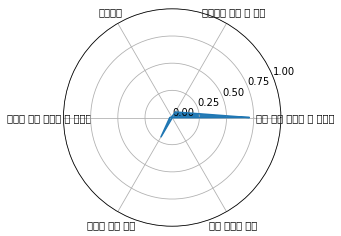

아동 학대 심각성 및 지속성  카테고리 입니다.
[[0.70482075 0.0592591  0.00736561 0.02165775 0.20477709 0.00211973]]
평가척도 점수는 6점 중 2 점입니다.


In [ ]:
category_evaluation_predict("오늘 엄마랑 아빠랑 놀이동산에 놀러갔다. 추러스도 먹고 맛있는 핫도그도 먹고 재밌는 롤러코스터도 많이 탔다. 집에 돌아오는길에 차에서 토했는데 엄마랑 아빠가 왜그러냐며 뭐라하셨다. 속상했다")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current fon

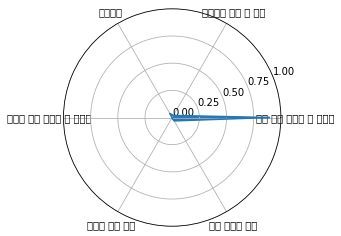

아동 학대 심각성 및 지속성  카테고리 입니다.
[[0.8885744  0.02215358 0.04434776 0.00217496 0.00646016 0.03628919]]
평가척도 점수는 6점 중 1 점입니다.


In [ ]:
category_evaluation_predict("3일째 부모님이 술마시느라 집에 안들어오고 있고 전화를 해도 안받아요. 집에 먹을게 없어요... 라면을 어떻게 끓이는 건가요")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current fon

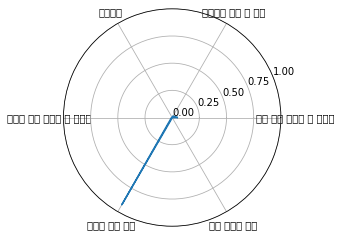

학대에 대한 인식  카테고리 입니다.
[[0.04652034 0.01637503 0.00187186 0.00622113 0.92684776 0.00216387]]
평가척도 점수는 6점 중 1 점입니다.


In [ ]:
category_evaluation_predict("제가 방탄소년단 팬이여서 콘서트에 갈려고 티켓을 예매했는데 조금있으면 중간고사라 부모님이 저한테 욕을 하고 저의 자존심을 무너트리고 있어요.")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current fon

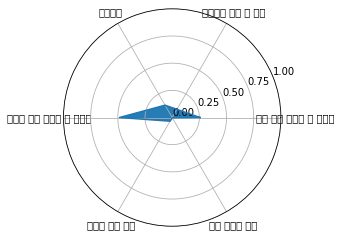

행위자 학대 심각성 및 지속성  카테고리 입니다.
[[0.2555372  0.0865877  0.13087429 0.4854248  0.03901767 0.00255838]]
평가척도 점수는 6점 중 2 점입니다.


In [ ]:
category_evaluation_predict("할아버지가 내가 너무 이쁘다며 내 몸 여러군데를 더듬는다. 그리고 장난으로 엉덩이나 가슴을 만지시는데 너무 불쾌하고 대처방안을 잘모르겠다.")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current fon

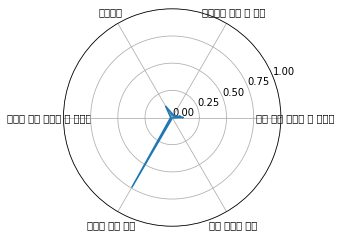

학대에 대한 인식  카테고리 입니다.
[[0.09730545 0.0254382  0.12024534 0.01350234 0.7392164  0.00429223]]
평가척도 점수는 6점 중 1 점입니다.


In [ ]:
category_evaluation_predict("옆집에서 2일에 한번씩 큰소리가 나며 아이가 우는 소리와 맞는 소리가 들립니다. 또한 아이의 위생상태는 매우 좋지 않으며 집이 아주 더러우며 악취가 납니다.")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current fon

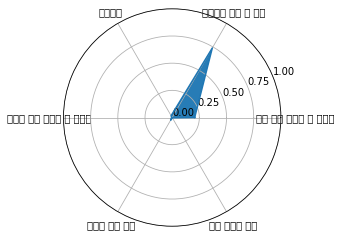

피해아동 욕구 및 특성  카테고리 입니다.
[[0.2074865  0.7384094  0.0189771  0.00460373 0.02769458 0.00282867]]
평가척도 점수는 6점 중 2 점입니다.


In [ ]:
category_evaluation_predict("집이 너무 더러우며 부모님이 치우시지를 않습니다. 정말 더러워서 생활하기가 힘듭니다.")